<a href="https://colab.research.google.com/github/Shresht-Gatla/AdvProg2025/blob/main/DLWeek3-NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Practical 3 - Building your first neural network
---

## Author : Amir Atapour-Abarghouei, amir.atapour-abarghouei@durham.ac.uk

This notebook will provide you with an excercise to practice building a simple nerual network.

Copyright (c) 2024 Amir Atapour-Abarghouei, UK.

License : LGPL - http://www.gnu.org/licenses/lgpl.html

For the first excercise, we will be using SVHN dataset.

As mentioned in [the dataset's website](http://ufldl.stanford.edu/housenumbers/), the Street View House Numbers (SVHN) Dataset can be seen as similar in flavour to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

In this practical, most elements of our code is missing. Your task is to complete the code.

First, let's import what we need and set Torch to use the GPU:

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

device = torch.device('cuda')
print('done!')

done!


Now let's load the data:

In [2]:
train_dataset = torchvision.datasets.SVHN('data', split='train', download=True, transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize(32),
        torchvision.transforms.ToTensor()
    ]))

test_dataset = torchvision.datasets.SVHN('data', split='test', download=True, transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize(32),
        torchvision.transforms.ToTensor()
    ]))
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=256, drop_last=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512, drop_last=True)

print(f"There are {len(train_dataset)} images in the training set!")
print(f"There are {len(test_dataset)} images in the test set!")

100%|██████████| 182M/182M [00:31<00:00, 5.75MB/s]
100%|██████████| 64.3M/64.3M [00:13<00:00, 4.76MB/s]


There are 73257 images in the training set!
There are 26032 images in the test set!


Tweak the parameters of the cell above (e.g. batch_size) as needed.

We can already see that this dataset is much larger than MNIST and will be more challenging. Let's look at a few of our images:

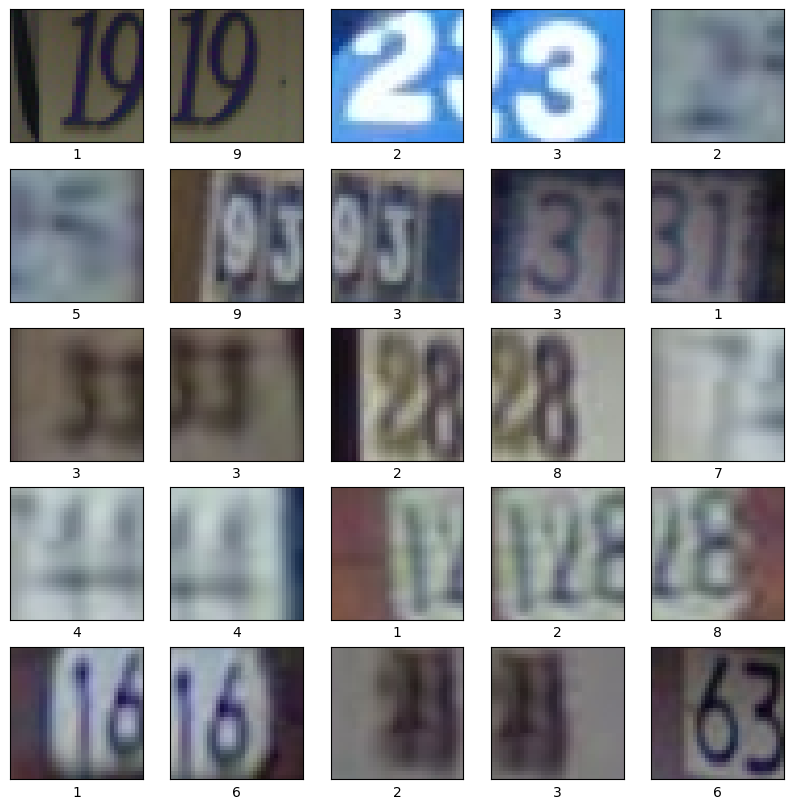

In [3]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_loader.dataset[i][0].permute(0,2,1).contiguous().permute(2,1,0), cmap=plt.cm.binary)
    plt.xlabel(classes[train_loader.dataset[i][1]])

Now, we are getting to the good part. We want to build our neural network.

Have a look at this tutorial, which should help you with how PyTorch supports building neural networks:

[https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

Construct a neural network, using the which:
- Has two layers of neurons
- Layer 1 is a Linear layer that recieves the input image flattened as a vector with a ReLU activation. Think about what the size of the input should be (i.e. how many neurons the network should have)
- Layer 2 is a Liear layer with 512 neurons and ReLU activation and goes to the output that predicts what class the input belongs to

In [22]:
from logging import logThreads
class SimpleMLP(nn.Module):
  def __init__(self):
    super(SimpleMLP, self).__init__()
    self.l1 = nn.Linear(in_features = 1024, out_features = 512)
    self.l2 = nn.Linear(in_features = 512, out_features = 10)

  def forward(self, x):
    x = self.l1(x)
    x = torch.nn.functional.relu(x)
    x = self.l2(x)
    return x

Now, let's create the model and the optimiser:

In [23]:
model = SimpleMLP().to(device)

optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
print(optimiser)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


We also need a loss function. Given that our problem is a classification one, which loss function do you think is most suitable?

These haven't been covered in depth in the lectures, but take a look at these resources:

https://pytorch.org/docs/stable/nn.html#loss-functions

https://neptune.ai/blog/pytorch-loss-functions

Complete the code below:

In [ ]:
criterion = ...

Now we are ready to start training. Some portion of the main loop has been completed for you but you will need to fill in the rest.

You might find this tutorial useful:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [ ]:
epoch = 0
# training loop
# train the model for 20 epochs:
while (epoch < 20):

    # iterate over the training dateset
    for i, batch in enumerate(train_loader):

        # sample x from the dataset
        x, t = batch
        x, t = x.to(device), t.to(device)

        # ....
        # complete the training
        # make sure you log and print the losses as well
        # ....

    epoch += 1

You can take inspiration from the lecture material here:

https://github.com/atapour/dl-pytorch/blob/main/4.Classifier/4_PyTorch_Programming_Classifier.ipynb

and plot the loss curves live to see how the model is training. You can also draw the loss curves using [matplotlib](https://matplotlib.org/) or [Weights and Biases](https://wandb.ai), as we learned in the lecture today.

What should the loss cureve look like? Does the loss curve you have plotted look as expected?

When the training is complete, it is time to test the model. Complete the main testing looop as well:

In [ ]:
# since we are not training anything, we don't need gradients:
with torch.no_grad():

  # iterate over the testing dateset
  for i, batch in enumerate(test_loader):

    # sample x from the dataset
    x, t = batch
    x, t = x.to(device), t.to(device)

    # ....
    # complete the testing loop
    # make sure you log and print the accuracy as well
    # ....
    # if you have are having trouble calculating and logging accuracy,
    # you might want to take inspiration from the lecture material:
    # https://github.com/atapour/dl-pytorch/blob/29652b1cf93222b50065be4498bd744dfae3fba3/4.Classifier/4_pytorch_programming_classifier.py
    # the best way to learn code is to look at other code
    # ....

What is the accuracy level you are getting?

If you have the time, go back to the cell where we created the model and change the architecture to see what difference it can make.

You can start experimenting with Convolutional layers:
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html